In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torch

import matplotlib.pyplot as plt 

import bliss
from bliss.encoders.detection import DetectionEncoder

In [ ]:
device = torch.device("cpu")
detection_fpath = "../../models/detection_19_19.pt"
detection = DetectionEncoder().to(device).eval()
detection.load_state_dict(
    torch.load(detection_fpath, map_location=device, weights_only=True)
)
detection = detection.requires_grad_(False)


In [ ]:
from bliss.datasets.io import load_dataset_npz
dataset_fpath = "../../data/datasets/train_ds_23.npz"
ds = load_dataset_npz(dataset_fpath)

In [ ]:
ds.keys()

dict_keys(['images', 'noiseless', 'uncentered_sources', 'centered_sources', 'paddings', 'plocs', 'n_sources', 'galaxy_bools', 'star_bools', 'galaxy_params', 'star_fluxes', 'fluxes'])

In [ ]:
images = ds['images']
images.shape, images.device

(torch.Size([10000, 1, 98, 98]), device(type='cpu'))

In [ ]:
from bliss.render_tiles import get_images_in_tiles
ptiles = get_images_in_tiles(images, 5, 53)
ptiles.shape

torch.Size([10000, 10, 10, 1, 53, 53])

In [ ]:
from bliss.datasets.generate_blends import get_full_catalog_from_dataset
fcat = get_full_catalog_from_dataset(ds, 50)

In [ ]:
fcat.plocs[0]

tensor([[18.4496,  4.7560],
        [41.4674,  7.7780],
        [34.3881,  3.3521],
        [40.1209, 35.2483],
        [22.6715, 26.1355],
        [48.9364, 26.0649],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000]])

In [ ]:
from bliss.catalog import FullCatalog
out = detection.variational_mode(images[:100])
fcat_pred = out.to_full_params()

In [ ]:
fcat_pred.n_sources

tensor([5, 2, 3, 2, 2, 3, 2, 7, 5, 7, 3, 2, 3, 4, 4, 4, 4, 5, 4, 2, 2, 6, 2, 4,
        2, 2, 2, 3, 3, 5, 4, 3, 6, 3, 3, 1, 7, 2, 4, 5, 3, 2, 5, 3, 4, 4, 4, 4,
        4, 6, 2, 5, 4, 4, 2, 5, 5, 1, 3, 3, 8, 4, 0, 4, 6, 3, 2, 1, 5, 5, 4, 5,
        3, 2, 6, 5, 4, 4, 3, 1, 2, 3, 2, 5, 3, 2, 2, 0, 5, 4, 3, 7, 2, 5, 4, 2,
        2, 2, 6, 2])

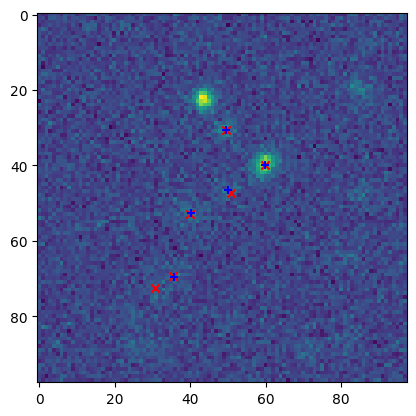

In [ ]:
bp = 24
idx = 51
plt.imshow(images[idx, 0])
for ii in range(fcat.n_sources[idx]):
    x = fcat.plocs[idx, ii, 1] + bp - 0.5
    y = fcat.plocs[idx, ii, 0] + bp - 0.5
    plt.scatter(x, y, marker='x', color='r')

for ii in range(fcat_pred.n_sources[0]):
    x = fcat_pred.plocs[idx, ii, 1] + bp - 0.5
    y = fcat_pred.plocs[idx, ii, 0] + bp - 0.5
    plt.scatter(x, y, marker='+', color='b')

In [ ]:
from bliss.encoders.detection import _compute_tiled_metrics

In [ ]:
dd = fcat.to_dict()
_dd = {k:v[:100] for k,v in dd.items()}
_fcat = FullCatalog(50, 50, _dd)
_fcat.n_sources

tensor([ 6,  5,  3,  5,  4,  3,  3,  8,  5,  6,  6,  1,  4,  7,  5,  4,  6,  7,
         6,  4,  7,  5,  2,  3,  3,  2,  4,  5,  4,  5,  5,  3, 10,  3,  6,  2,
         7,  2,  5,  5,  4,  3,  5,  4,  5,  7,  7,  5,  6,  7,  3,  6,  5,  6,
         2,  7,  7,  4,  2,  4,  8,  6,  2,  5,  9,  3,  2,  4,  5,  9,  5,  8,
         7,  6,  7,  7,  6,  4,  4,  5,  2,  5,  3,  3,  4,  3,  6,  1,  9,  6,
         4, 10,  2,  7, 10,  3,  3,  3, 10,  5])

In [ ]:
results = _compute_tiled_metrics(_fcat.to_tile_params(5, ignore_extra_sources=True), fcat_pred.to_tile_params(5))

In [ ]:
results

{'val/tiled/precision': tensor(0.8895),
 'val/tiled/recall': tensor(0.6474),
 'val/tiled/f1': tensor(0.7494),
 'val/tiled/avg_dist': tensor(0.4972)}